In [14]:
##
## Preparación
##
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
## Se lee el archivo de datos
df = pd.read_csv('data/scopus.csv')

## se imprimen los nombres de las columnas para verificar
df.columns

Index(['Authors', 'Author(s) ID', 'Title', 'Year', 'Source title', 'Volume',
       'Issue', 'Art. No.', 'Page start', 'Page end', 'Page count', 'Cited by',
       'DOI', 'Link', 'Document Type', 'Publication Stage', 'Access Type',
       'Source', 'EID'],
      dtype='object')

In [16]:
##
## La columna 'Cited by' tiene registros con NaN. Estos valores se 
## convierten a 0
##
df['Cited by'] = df['Cited by'].map(lambda x: 0 if np.isnan(x) else x)

In [17]:
##
## Se ordena por las citas y luego se extraen los campos de interés.
##
most_cited = (df.sort_values(by=['Cited by'], ascending=False))[['Authors', 'Title', 'Year', 'Cited by']]

##
## Se limita el DataFrame a los 10 primeros registros.
##
most_cited = most_cited[0:10]

##
## Se construye una lista de strings con la información
## bibliográfica de interés
##
table = []
for a,b,c,d in most_cited.values.tolist():
    table += [a + b + ';' + str(c) + ',' + str(int(d))]
most_cited = table

##
## Se imprimen para verificar
##
most_cited

['Ayala, G., Agudelo, A., Vargas, R.Effect of glycerol on the electrical properties and phase behavior of cassava starch biopolymers [Efecto del glicerol sobre las propiedades eléctricas y comportamiento de fase en biopolímeros de almidón de yuca];2012,27',
 'Cabral, P., Zamyatin, A.Markov processes in modeling land use and land cover changes in Sintra-Cascais, Portugal [Procesos de markov en la modelización de alteraciones del uso e ocupación del suelo en Sintra-Cascais, Portugal];2009,24',
 'Rojas, D., Cipriano, A.Model based predictive control of a rougher flotation circuit considering grade estimation in intermediate cells [Control predictivo de un circuito de flotación rougher considerando estimación de leyes en celdas intermedias];2011,22',
 'Alcocer, W., Vela, L., Blanco, A., Gonzalez, J., Oliver, M.Major trends in the development of ankle rehabilitation devices [Principales tendencias en el desarrollo de dispositivos de rehabilitacion para tobillo];2012,21',
 'Parra, E.R., Aran

In [18]:
count = df.groupby('Year')['Authors'].agg(['count'])
count

,count
Year,
2008,67
2009,106
2010,112
2011,143
2012,164
2013,131
2014,197
2015,184
2016,151


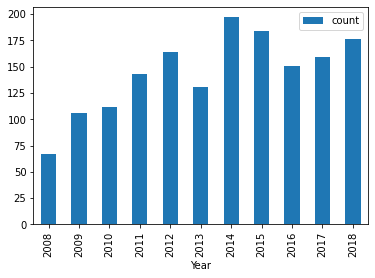

In [19]:
##
## Se genera el gráfico y se salva en la carpeta docs
##
count.plot.bar();
plt.savefig('docs/numbyyear.png')

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [25]:
!cat templates/index.html

<!DOCTYPE html>
<html>
<head>
   <title>Ejemplo de un Dashboard</title>
</head>
<body>

    <center>
        <h1>Analisis de las publicaciones de la revista Dyna-Colombia</h1>
    </center>
    

    <p>Esta es una demostaacion de la creacion de un Dashboard estatico en GitHub Pages</p>

    <h2>Cantidad de articulos publicados por ano</h2>
  
    <center>
        <img src="numbyyear.png">
    </center>
    
    

    <h2>Articulos mas citados</h2>

    <ul>
        {% for i in articles %}
        <li> {{ i }} </li>
        {% endfor %}
    </ul>



</body>
</html>

In [26]:
from jinja2 import Template

##
## Carga el template almacenado como una cadena de texto
##
template = Template(open('templates/index.html', 'rt').read())

##
## Genera el archivo index.html pasando en la variable articles 
## de la plantilla, el conteido de la variable most_cited
##
open("docs/index.html","w").write( template.render(articles = most_cited))

3223